In [1]:
import csv
from typing import List, Dict

def get_file(file_name: str) -> List[List[str]]:
    behavior = []
    with open(file_name, 'r') as file:
        csv_read = csv.reader(file)
        for row in csv_read:
            behavior.append(row)

    return behavior

behavior = get_file("/content/shopping_behavior_updated.csv")

For the attached data file in csv format, perform the following tasks:
1. Not using the pandas library (or any similar library)
2. Using the pandas library (or similar)

1.1 A function that returns the total spend of all shoppers in each season and sort in descending order.

In [2]:
def get_all_value_ps(data: List[List[str]]) -> Dict:
    behavior_dict = {}
    amount_index = data[0].index('Purchase Amount (USD)')
    season_index = data[0].index('Season')
    for value in data[1:]:
        if value[season_index] not in behavior_dict:
            behavior_dict[value[season_index]] = [int(value[amount_index])]
        else:
            behavior_dict[value[season_index]].append(int(value[amount_index]))
    for k,v in behavior_dict.items():
        behavior_dict[k] = sum(v)
    sorted_behavior_dict = dict(sorted(behavior_dict.items(), key=lambda item: item[1], reverse=True))
    return sorted_behavior_dict
print(get_all_value_ps(behavior))

{'Fall': 60018, 'Spring': 58679, 'Winter': 58607, 'Summer': 55777}


1.2. Function returning the 3 most frequently purchased handbag colours (Handbag)

In [3]:
def get_handbag(data: List[List[str]]) -> Dict:
    behavior_dict = {}
    item_index = data[0].index('Item Purchased')
    color_index = data[0].index('Color')
    for value in data[1:]:
        if value[item_index] == 'Handbag':
            if value[color_index] not in behavior_dict:
                behavior_dict[value[color_index]] = 1
            else:
                behavior_dict[value[color_index]] += 1
    sorted_dict = dict(sorted(behavior_dict.items(), key=lambda item: item[1], reverse=True))
    top_colors = {k: sorted_dict[k] for k in list(sorted_dict)[:3]}
    return top_colors
print(get_handbag(behavior))

{'Charcoal': 12, 'Yellow': 11, 'Gray': 10}


1.3 A function returning men, aged 18-25, who have purchased blouses (Blouse) in size XL

In [4]:
def get_men_blouse(data: List[List[str]]) -> Dict:
    behavior_dict = {}
    gender_index = data[0].index('Gender')
    age_index = data[0].index('Age')
    item_index = data[0].index('Item Purchased')
    size_index = data[0].index('Size')
    for value in data[1:]:
        if value[gender_index] == 'Male' and value[item_index] == 'Blouse' and value[size_index] == 'XL' and 18 <= int(value[age_index]) <= 25:
            if value[gender_index] not in behavior_dict:
                behavior_dict[value[gender_index]] = 1
            else:
                behavior_dict[value[gender_index]] += 1
    return behavior_dict
print(get_men_blouse(behavior))

{'Male': 2}


1.4 Pie chart showing the distribution of the types of clothes purchased among women aged 25-45.

In [5]:
def get_women_clothes(data: List[List[str]]) -> Dict:
    behavior_dict = {}
    gender_index = data[0].index('Gender')
    age_index = data[0].index('Age')
    category_index = data[0].index('Category')
    for value in data[1:]:
        if value[gender_index] == 'Female' and 25 <= int(value[age_index]) <= 45:
            if value[category_index] not in behavior_dict:
                behavior_dict[value[category_index]] = 1
            else:
                behavior_dict[value[category_index]] += 1
    return behavior_dict
print(get_women_clothes(behavior))

{'Accessories': 160, 'Footwear': 77, 'Clothing': 235, 'Outerwear': 34}


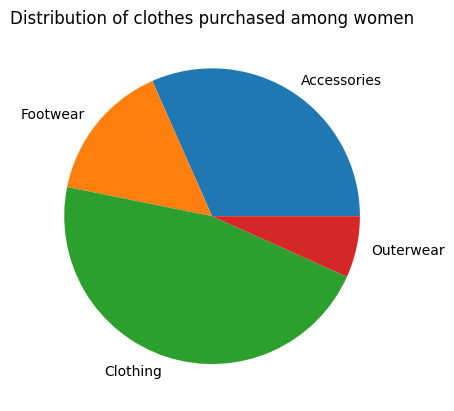

In [6]:
import matplotlib.pyplot as plt
plt.pie(get_women_clothes(behavior).values(), labels=get_women_clothes(behavior).keys())
plt.title('Distribution of clothes purchased among women')
plt.show()

1.5. Age distribution in the data in the form of a histogram

In [7]:
def get_age(data: List[List[str]]) -> Dict:
    behavior_dict = {}
    age_index = data[0].index('Age')
    for value in data[1:]:
        if value[age_index] not in behavior_dict:
            behavior_dict[value[age_index]] = 1
        else:
            behavior_dict[value[age_index]] += 1
    return behavior_dict

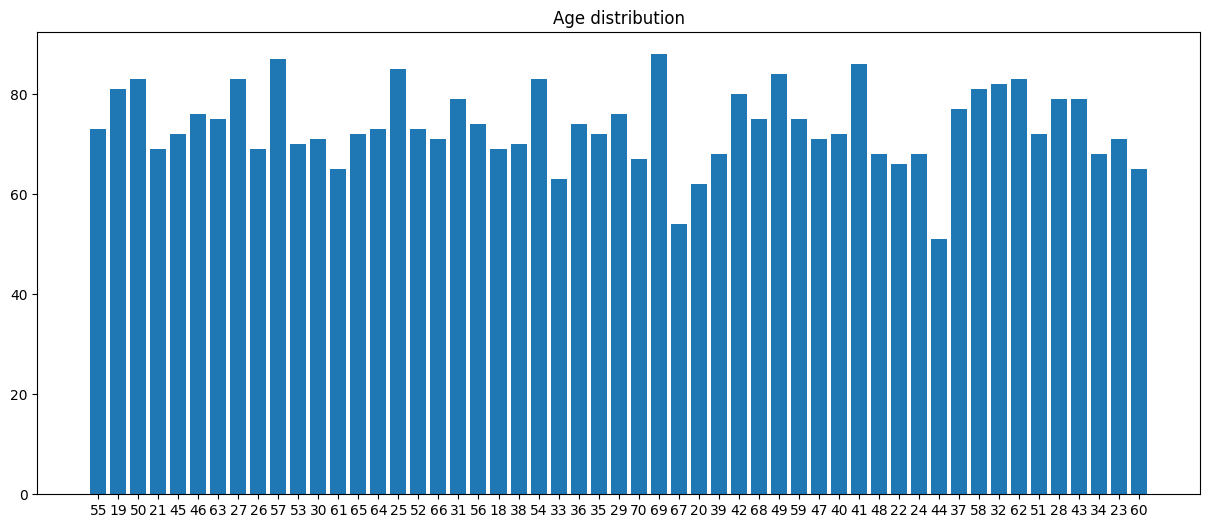

In [8]:
plt.figure(figsize=(15,6))
plt.bar(get_age(behavior).keys(), get_age(behavior).values())
plt.title('Age distribution')
plt.show()

1.6. The most common delivery methods chosen by customers.

In [9]:
def get_most_used_ship(data: List[List[str]]) -> Dict:
    behavior_dict = {}
    ship_index = data[0].index('Shipping Type')
    for value in data[1:]:
        if value[ship_index] not in behavior_dict:
            behavior_dict[value[ship_index]] = 1
        else:
            behavior_dict[value[ship_index]] += 1
    sorted_dict = dict(sorted(behavior_dict.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict
print(get_most_used_ship(behavior))

{'Free Shipping': 675, 'Standard': 654, 'Store Pickup': 650, 'Next Day Air': 648, 'Express': 646, '2-Day Shipping': 627}


1.7. Number of clothes bought in each colour each season.

In [10]:
def get_purchased_colors(data: List[List[str]]) -> Dict:
    behavior_dict = {}
    color_index = data[0].index('Color')
    season_index = data[0].index('Season')
    for value in data[1:]:
        if value[season_index] not in behavior_dict:
            behavior_dict[value[season_index]] = {}
        if value[color_index] not in behavior_dict[value[season_index]]:
            behavior_dict[value[season_index]][value[color_index]] = 1
        else:
            behavior_dict[value[season_index]][value[color_index]] += 1
    return behavior_dict

In [11]:
behavior_dict = get_purchased_colors(behavior)
for season, color_counts in behavior_dict.items():
    print(f"Season: {season}")
    for color, count in color_counts.items():
        print(f"    Color: {color}, Count: {count}")

Season: Winter
    Color: Gray, Count: 27
    Color: Maroon, Count: 44
    Color: Charcoal, Count: 43
    Color: Olive, Count: 43
    Color: Gold, Count: 34
    Color: Teal, Count: 37
    Color: Lavender, Count: 38
    Color: Black, Count: 40
    Color: White, Count: 36
    Color: Brown, Count: 40
    Color: Red, Count: 39
    Color: Beige, Count: 37
    Color: Peach, Count: 45
    Color: Orange, Count: 33
    Color: Magenta, Count: 30
    Color: Green, Count: 50
    Color: Violet, Count: 37
    Color: Indigo, Count: 41
    Color: Yellow, Count: 46
    Color: Turquoise, Count: 41
    Color: Silver, Count: 38
    Color: Purple, Count: 33
    Color: Cyan, Count: 39
    Color: Blue, Count: 35
    Color: Pink, Count: 45
Season: Spring
    Color: Maroon, Count: 39
    Color: Turquoise, Count: 41
    Color: Pink, Count: 44
    Color: Violet, Count: 45
    Color: Gray, Count: 48
    Color: Red, Count: 31
    Color: Orange, Count: 39
    Color: Beige, Count: 39
    Color: Indigo, Count: 37
   

In [12]:
import pandas as pd
df = pd.read_csv("/content/shopping_behavior_updated.csv")

2.1. A function returning the total expenditure of shoppers by product type (Category)

In [13]:
df1 = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
print(df1)

      Category  Purchase Amount (USD)
0  Accessories                  74200
1     Clothing                 104264
2     Footwear                  36093
3    Outerwear                  18524


2.2. A function returning the 5 cities in which the most dresses were bought (Dresses)

In [14]:
df2 = df[df['Item Purchased'] == 'Dress'].groupby('Location')['Item Purchased'].count().reset_index()
df2 = df2.sort_values(by='Item Purchased', ascending = False).reset_index()
df2 = df2.head(5)
print(df2)

   index       Location  Item Purchased
0      9        Georgia               8
1      4     California               7
2     35   Rhode Island               6
3     19  Massachusetts               6
4     43     Washington               6


2.3. A function returning women under 40 years of age who have subscribed have made more than 15 purchases (Previous Purchases)

In [15]:
df3 = df[(df['Gender'] == 'Female') & (df['Age'] <= 40) & (df['Subscription Status'] == 'Yes') & (df['Previous Purchases'] > 15)]
print(df3)

Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


2.4. Chart showing the distribution of payment methods according to the age of the person

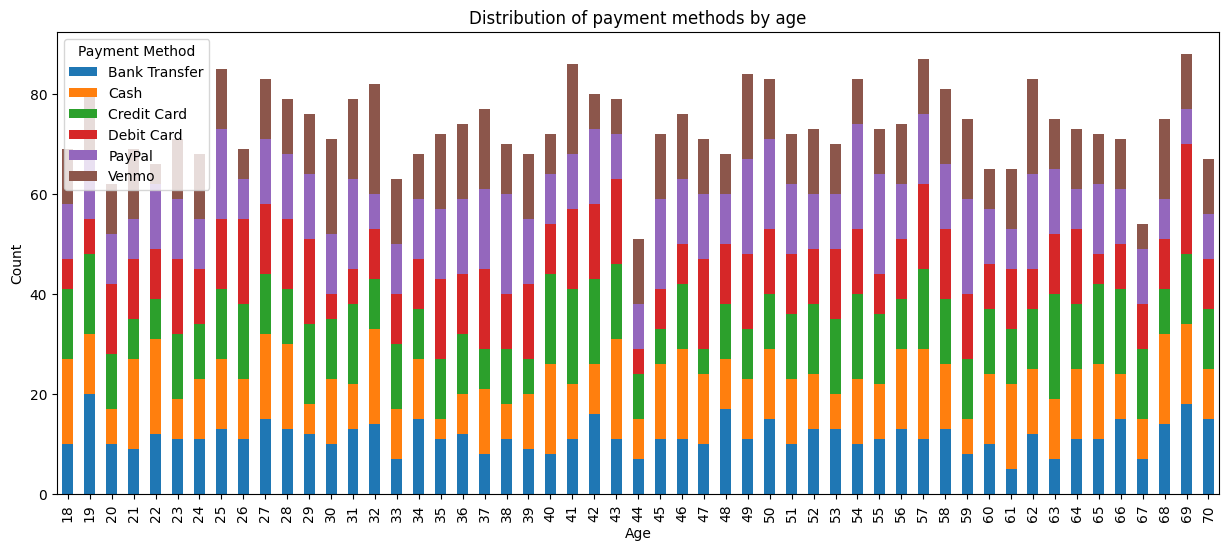

In [16]:
df4 = pd.crosstab(df['Age'], df['Payment Method'])
df4.plot(kind='bar', stacked=True, figsize=(15,6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of payment methods by age')
plt.show()

2.5. Distribution of Shipping Type among the data in the form of a histogram

In [17]:
df5 = df['Shipping Type'].value_counts()
print(df5)

Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: Shipping Type, dtype: int64


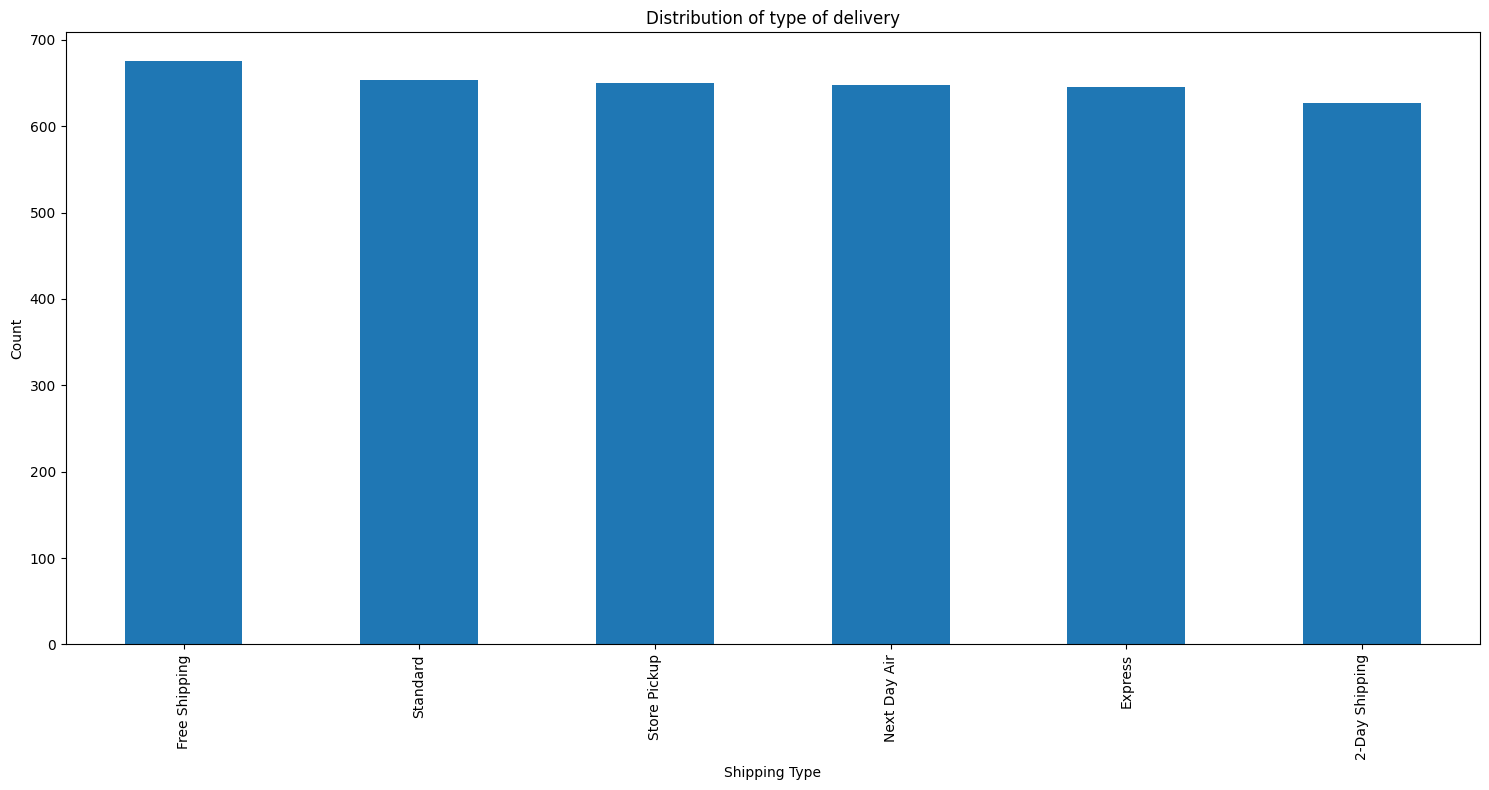

In [18]:
df5.plot(kind='bar', stacked=True, figsize=(15,8))
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.title('Distribution of type of delivery')
plt.tight_layout()
plt.show()

2.6. Average rating given to a location by customers

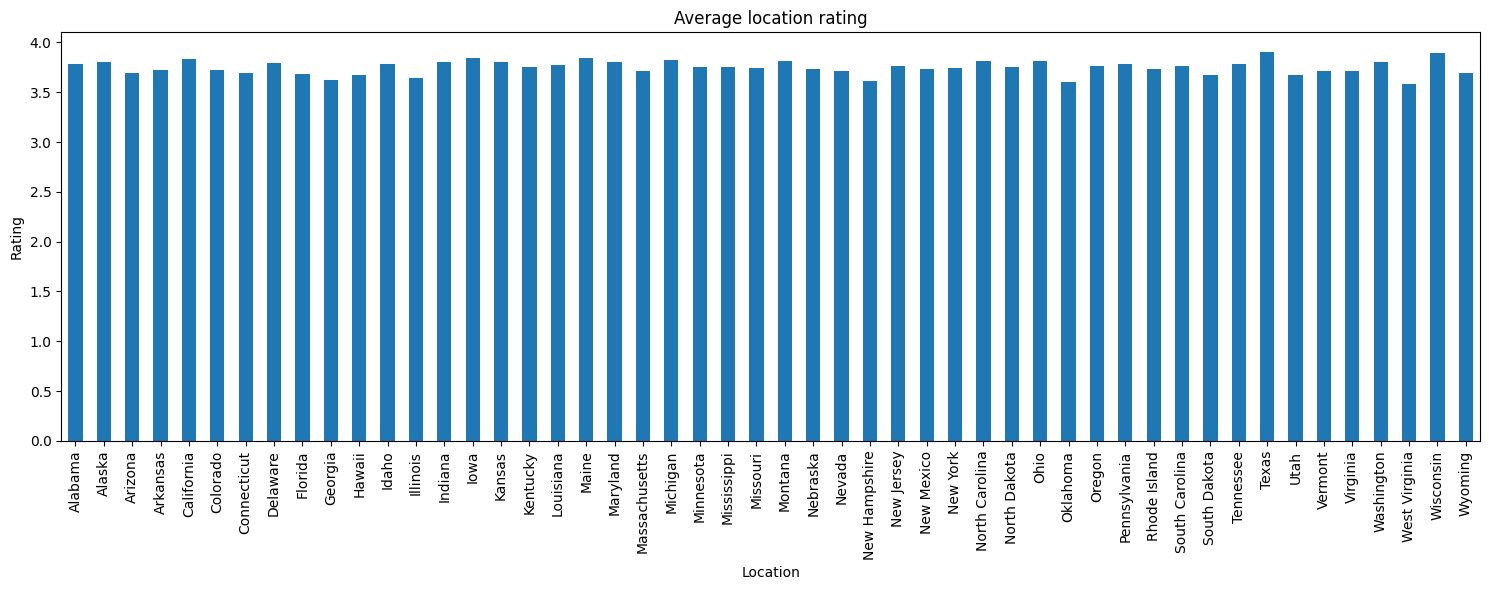

In [19]:
df6 = df.groupby('Location')['Review Rating'].mean()
df6.plot(kind='bar', stacked=True, figsize=(15,6))
plt.xlabel('Location')
plt.ylabel('Rating')
plt.title('Average location rating')
plt.tight_layout()
plt.show()

2.7. Number of transactions with and without subscription.

In [20]:
df7 = df['Subscription Status'].value_counts()
print(df7)

No     2847
Yes    1053
Name: Subscription Status, dtype: int64


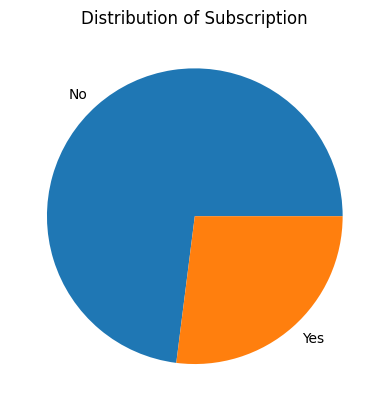

In [21]:
plt.pie(df7, labels=df7.index)
plt.title("Distribution of Subscription")
plt.show()